## Stochastic Gradient Descent

### Dataset 
#### https://www.kaggle.com/competitions/boston-housing/data

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
data_overview={
"crim":  "per capita crime rate by town.",
"zn" : "proportion of residential land zoned for lots over 25,000 sq.ft.",
"indus" : "proportion of non-retail business acres per town.",
"chas" : "Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).",
"nox" : "nitrogen oxides concentration (parts per 10 million).",
"rm" : "average number of rooms per dwelling.",
"age" : "proportion of owner-occupied units built prior to 1940.",
"dis" : "weighted mean of distances to five Boston employment centres.",
"rad" : "index of accessibility to radial highways.",
"tax" : "full-value property-tax rate per $10,000.",
"ptratio" : "pupil-teacher ratio by town.",
"black" : "1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.",
"lstat": "lower status of the population (percent).",
"medv" : "median value of owner-occupied homes in $1000s"
}

def tell_me_about(field):
    return data_overview[field]

In [66]:
tell_me_about("medv")

'median value of owner-occupied homes in $1000s'

In [67]:
train_df=pd.read_csv('data/train.csv')
train_df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [68]:
train_df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [69]:
fe_columns=[ 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']

## Part 1

In [70]:
train_df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [71]:
train_df.info()
## everything is numeric and non null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.2 KB


In [72]:
train_df.shape

(333, 15)

In [73]:
def basic_summary(df):
    summary_info ={
        "missing_values" : df.isnull().sum(),
        "dtypes" : df.dtypes, 
        "stats" : df.describe().T
    }
    print(summary_info)

In [74]:
basic_summary(train_df)

{'missing_values': ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64, 'dtypes': ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object, 'stats':          count        mean         std        min        25%        50%  \
ID       333.0  250.951952  147.859438    1.00000  123.00000  244.00000   
crim     333.0    3.360341    7.352272    0.00632    0.07896    0.26169   
zn       333.0   10.689189   22.674762    0.00000    0.00000    0.00000   
indus    333.0   11.293483    6.998123    0.74000    5.13000    9.90000   
chas     333.0    0.060060    0.237956    0.00000    0.00000    0.00000   
nox

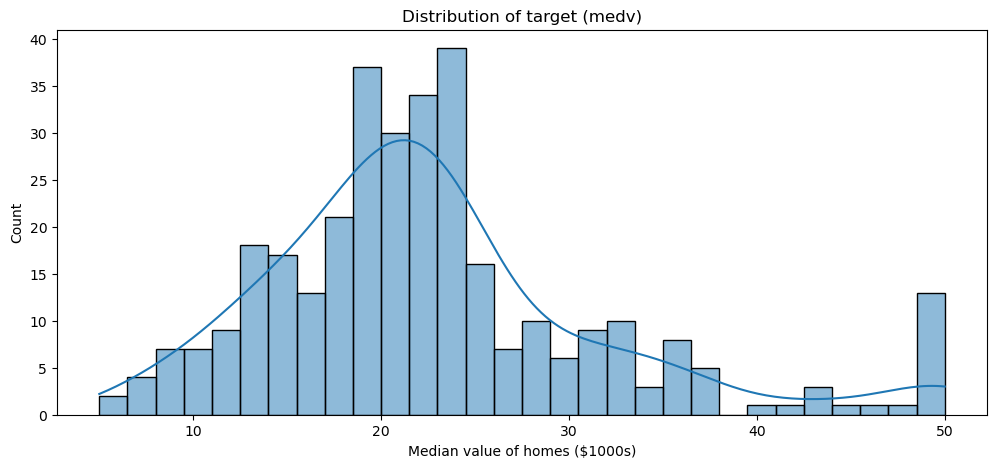

In [75]:
plt.figure(figsize=(12,5))
sns.histplot(train_df['medv'], kde=True, bins=30)
plt.title('Distribution of target (medv)')
plt.xlabel('Median value of homes ($1000s)')
plt.ylabel('Count')
plt.show()

## This is almost normal distributed 

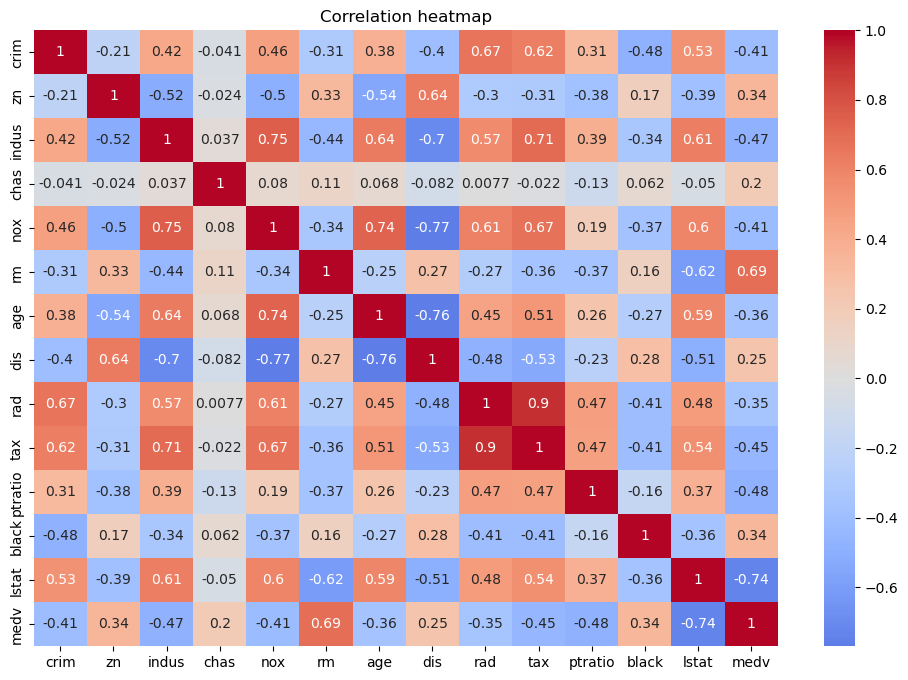

In [76]:
plt.figure(figsize=(12,8))
corr = train_df.drop(columns='ID').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation heatmap')
plt.show()

## Most of the columns are highly correlated with other variables 

<Figure size 1500x800 with 0 Axes>

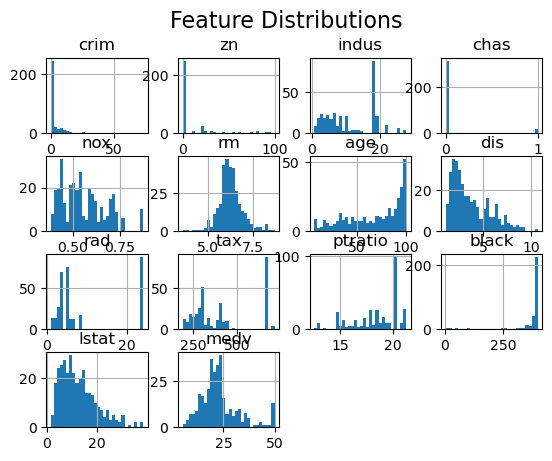

In [77]:
plt.figure(figsize=(15,8))
train_df.drop(columns='ID').hist(bins=30)
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

In [ ]:
numeric_cols=train_df.drop(columns=['ID', 'chas', 'medv']).columns

# chas is categorical column having only 0, 1 
# ID doesn't influence anything
# medv is the output/target variable 

In [84]:
tell_me_about("chas")

'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).'

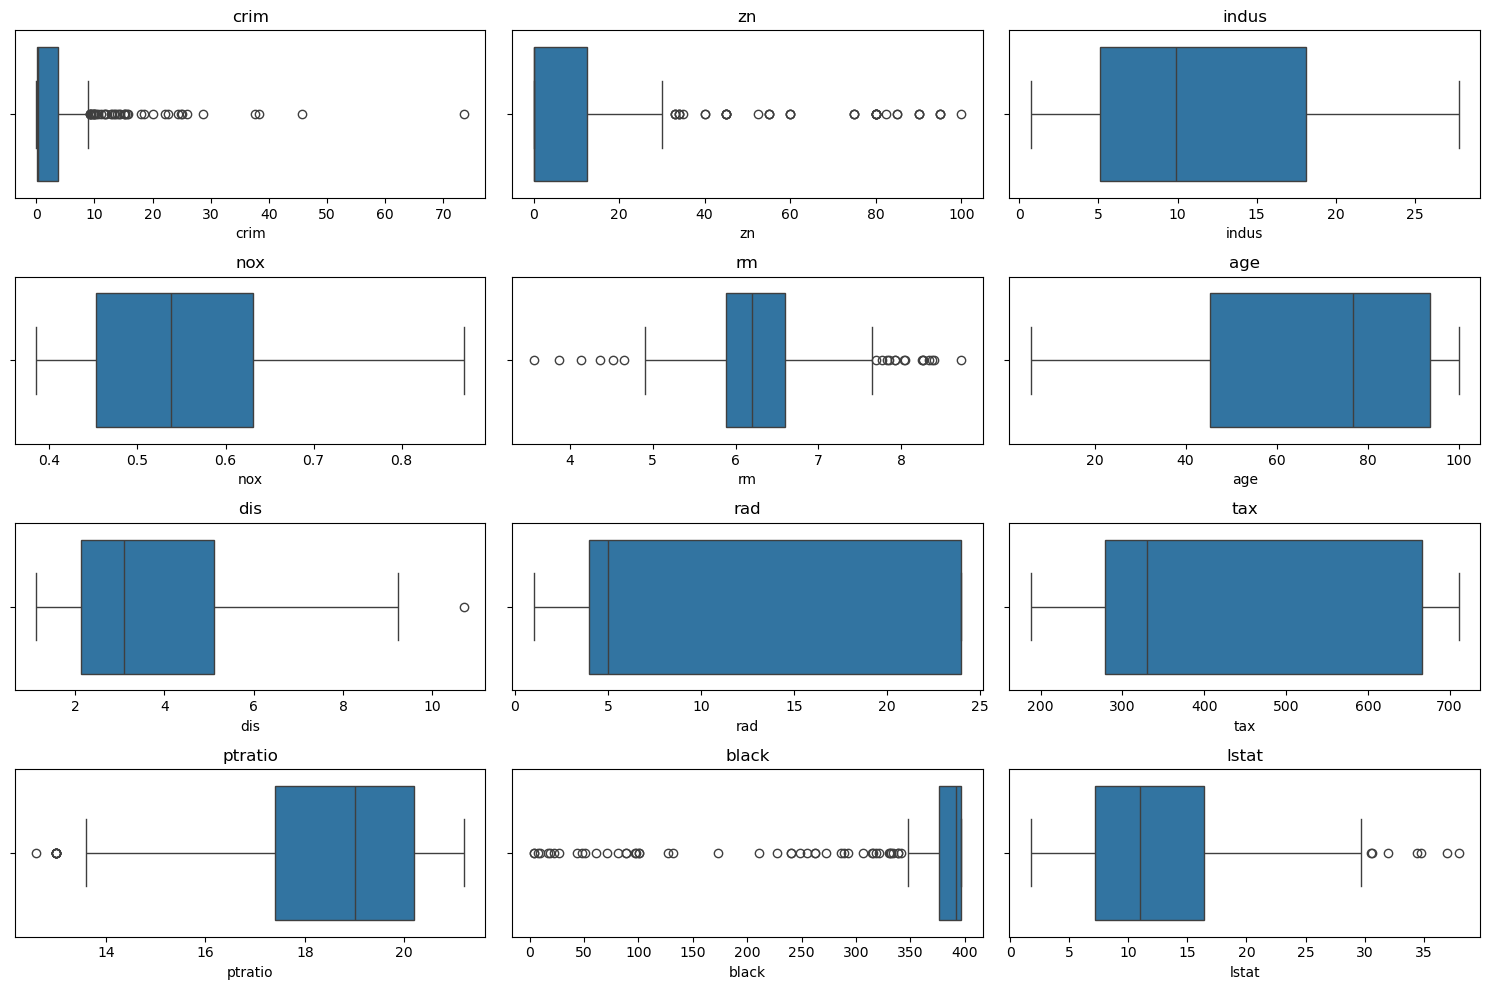

In [79]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols,1):
    plt.subplot(4,3,i)
    sns.boxplot(x=train_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
## Since the columns are having different numeric ranges, we should do the scaling too

## Part 2

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [82]:
## Features and target
X_train_full = train_df.drop(columns= ['ID', 'medv'])
y_train_full = train_df['medv']

In [83]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split (
    X_train_full, y_train_full, test_size=0.20, random_state=42)

In [86]:
train_df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [87]:
numeric_features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'black', 'lstat']
categorical_features = ['chas', 'rad' ]

In [88]:
tell_me_about("rad")

'index of accessibility to radial highways.'

In [ ]:
numeric_transformer = StandardScaler()

In [ ]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop  ='first') 
## handle_unknown is important to be ignored, because u might have instances where the type of data say a particular color was absent in the training dataset but muight come up in test dataset, so we need to ignre that